In [ ]:
!python --version

Python 3.10.12


https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [ ]:
CAMINHO = ''

# imports
---

In [ ]:
import pandas as pd

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# obtendo a base de dados
---

In [ ]:
dataframe = pd.read_csv(CAMINHO)

In [ ]:
dataframe.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

# organizando os dados
---

In [ ]:
dataframe.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
dataframe = dataframe.drop(columns=['CUST_ID', 'TENURE'], axis=1)

In [ ]:
dataframe.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

In [ ]:
dataframe.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
dataframe['MINIMUM_PAYMENTS'].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [ ]:
dataframe['MINIMUM_PAYMENTS'] = dataframe['MINIMUM_PAYMENTS'].fillna(
    dataframe['MINIMUM_PAYMENTS'].median())

In [ ]:
dataframe['CREDIT_LIMIT'] = dataframe['CREDIT_LIMIT'].fillna(
    dataframe['CREDIT_LIMIT'].mode()[0])

In [ ]:
dataframe.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
values = Normalizer().fit_transform(dataframe.values)

In [ ]:
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

# executando o clustering
---

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100)

In [ ]:
y_pred = kmeans.fit_predict(values)

# silhouette
---

In [ ]:
labels = kmeans.labels_
labels

array([0, 2, 0, ..., 0, 0, 3], dtype=int32)

In [ ]:
silhouette = silhouette_score(values, labels, metric='euclidean')
silhouette

0.36454411415175675

Quanto mais próximo de 1 estiver o valor de silhouette mais separados estão os clusters.

# davies-bouldin
---

In [ ]:
dbs = davies_bouldin_score(values, labels)
dbs

1.0759640420985468

Quanto menor o valor final mais similares são os clusters.

# calinski-harabasz
---

In [ ]:
calinski = calinski_harabasz_score(values, labels)
calinski

3431.7970107150363

Quanto maior o valor do índice, melhor a qualidade do agrupamento.

# validando os clusters
---

Temos três valores para para interpretar com diferentes métricas, mas como faremos isso?

## validação relativa

Compararmos o valor das métricas com base em configurações diferentes do nosso algorítimo. A ideia é que assim ajustemos os parâmetros do algorítimo para obter os melhores resultados.

In [ ]:
def clustering(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
  labels = kmeans.fit_predict(dataset)

  s = silhouette_score(dataset, labels, metric='euclidean')
  d = davies_bouldin_score(dataset, labels)
  c = calinski_harabasz_score(dataset, labels)

  return s, d, c

In [ ]:
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [ ]:
clustering(3, values)

(0.3272203126696238, 1.3096073640088426, 3526.440519908274)

In [ ]:
clustering(5, values)

(0.3645412082353538, 1.0759109484969387, 3431.794135866532)

In [ ]:
clustering(10, values)

(0.35144548748644266, 1.1159094906016285, 3019.197231029985)

In [ ]:
clustering(20, values)

(0.2791197961034654, 1.210018284871413, 2416.494921592389)

In [ ]:
clustering(50, values)

(0.24963507619369185, 1.2326923168791821, 1609.7443961194235)

Seguiremos com a configuração de 5 clusters, pois obtemos um resultado bom no índice de silhouette, que é bastante popular, então é interessante utilizá-lo como medidor principal.

## validando a estrutura dos clusters

In [ ]:
f'{dataframe.shape[0]} linhas, {dataframe.shape[1]} colunas'

'8950 linhas, 16 colunas'

In [ ]:
random_data = np.random.rand(dataframe.shape[0], dataframe.shape[1])

In [ ]:
clustering(5, random_data)

(0.03960164135713628, 3.4918397723861148, 303.222292526655)

In [ ]:
clustering(5, values)

(0.3486361382475878, 1.1526565665992343, 3422.8431338804794)

Temos uma diferença grande entre nosso banco de dados original e o conjunto aleatório, o que é bom para nossa validação.

## verificando a estabilidade dos clusters

A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente.

In [ ]:
set1, set2, set3 = np.array_split(values, 3)

In [ ]:
clustering(5, set1)

(0.36871947128237154, 1.056234682502021, 1204.1115110650271)

In [ ]:
clustering(5, set2)

(0.35416642754504835, 1.1382306445993162, 1194.9519865048883)

In [ ]:
clustering(5, set3)

(0.36704573758244236, 1.0990426578873276, 1167.5322875560996)

Temos valores parecidos nos três sets em três métricas diferentes, isso indica que nosso cluster é válido.

# gerando gráficos
---

Temos 16 atributos, isto é, 16 dimensões. Não podemos inserir tudo isso em um gráfico, portanto começaremos por analisar dois atributos: PURCHASES que é o valor total usado pelo cartão do cliente e PAYMENTS, que é o valor total realmente pago pelo cliente.

In [ ]:
dataframe[['PURCHASES', 'PAYMENTS']]

PURCHASES     PAYMENTS
0         95.40   201.802084
1          0.00  4103.032597
2        773.17   622.066742
3       1499.00     0.000000
4         16.00   678.334763
...         ...          ...
8945     291.12   325.594462
8946     300.00   275.861322
8947     144.40    81.270775
8948       0.00    52.549959
8949    1093.25    63.165404

[8950 rows x 2 columns]

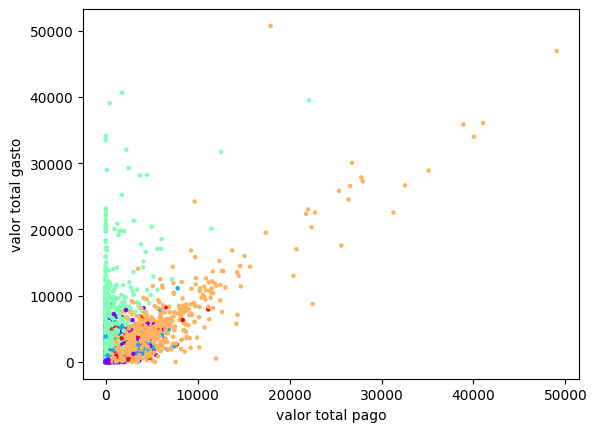

In [ ]:
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'],
            c=labels, s=5, cmap='rainbow')
plt.xlabel('valor total pago')
plt.ylabel('valor total gasto')
plt.show()

# intepretação visual
---

De maneira geral, o que conseguimos perceber é que o cluster vermelho representa os clientes que gastaram mais, contudo não pagaram a fatura ou a pagaram parcialmente.

Já o cluster representado pela cor verde, notamos uma diagonal, o que indica que a medida que o valor gasto aumenta o valor pago também aumenta. Esse cluster representa os clientes que pagaram a fatura ou quase seu valor total.

# gerados gráficos par a par
---

In [ ]:
dataframe['cluster'] = labels

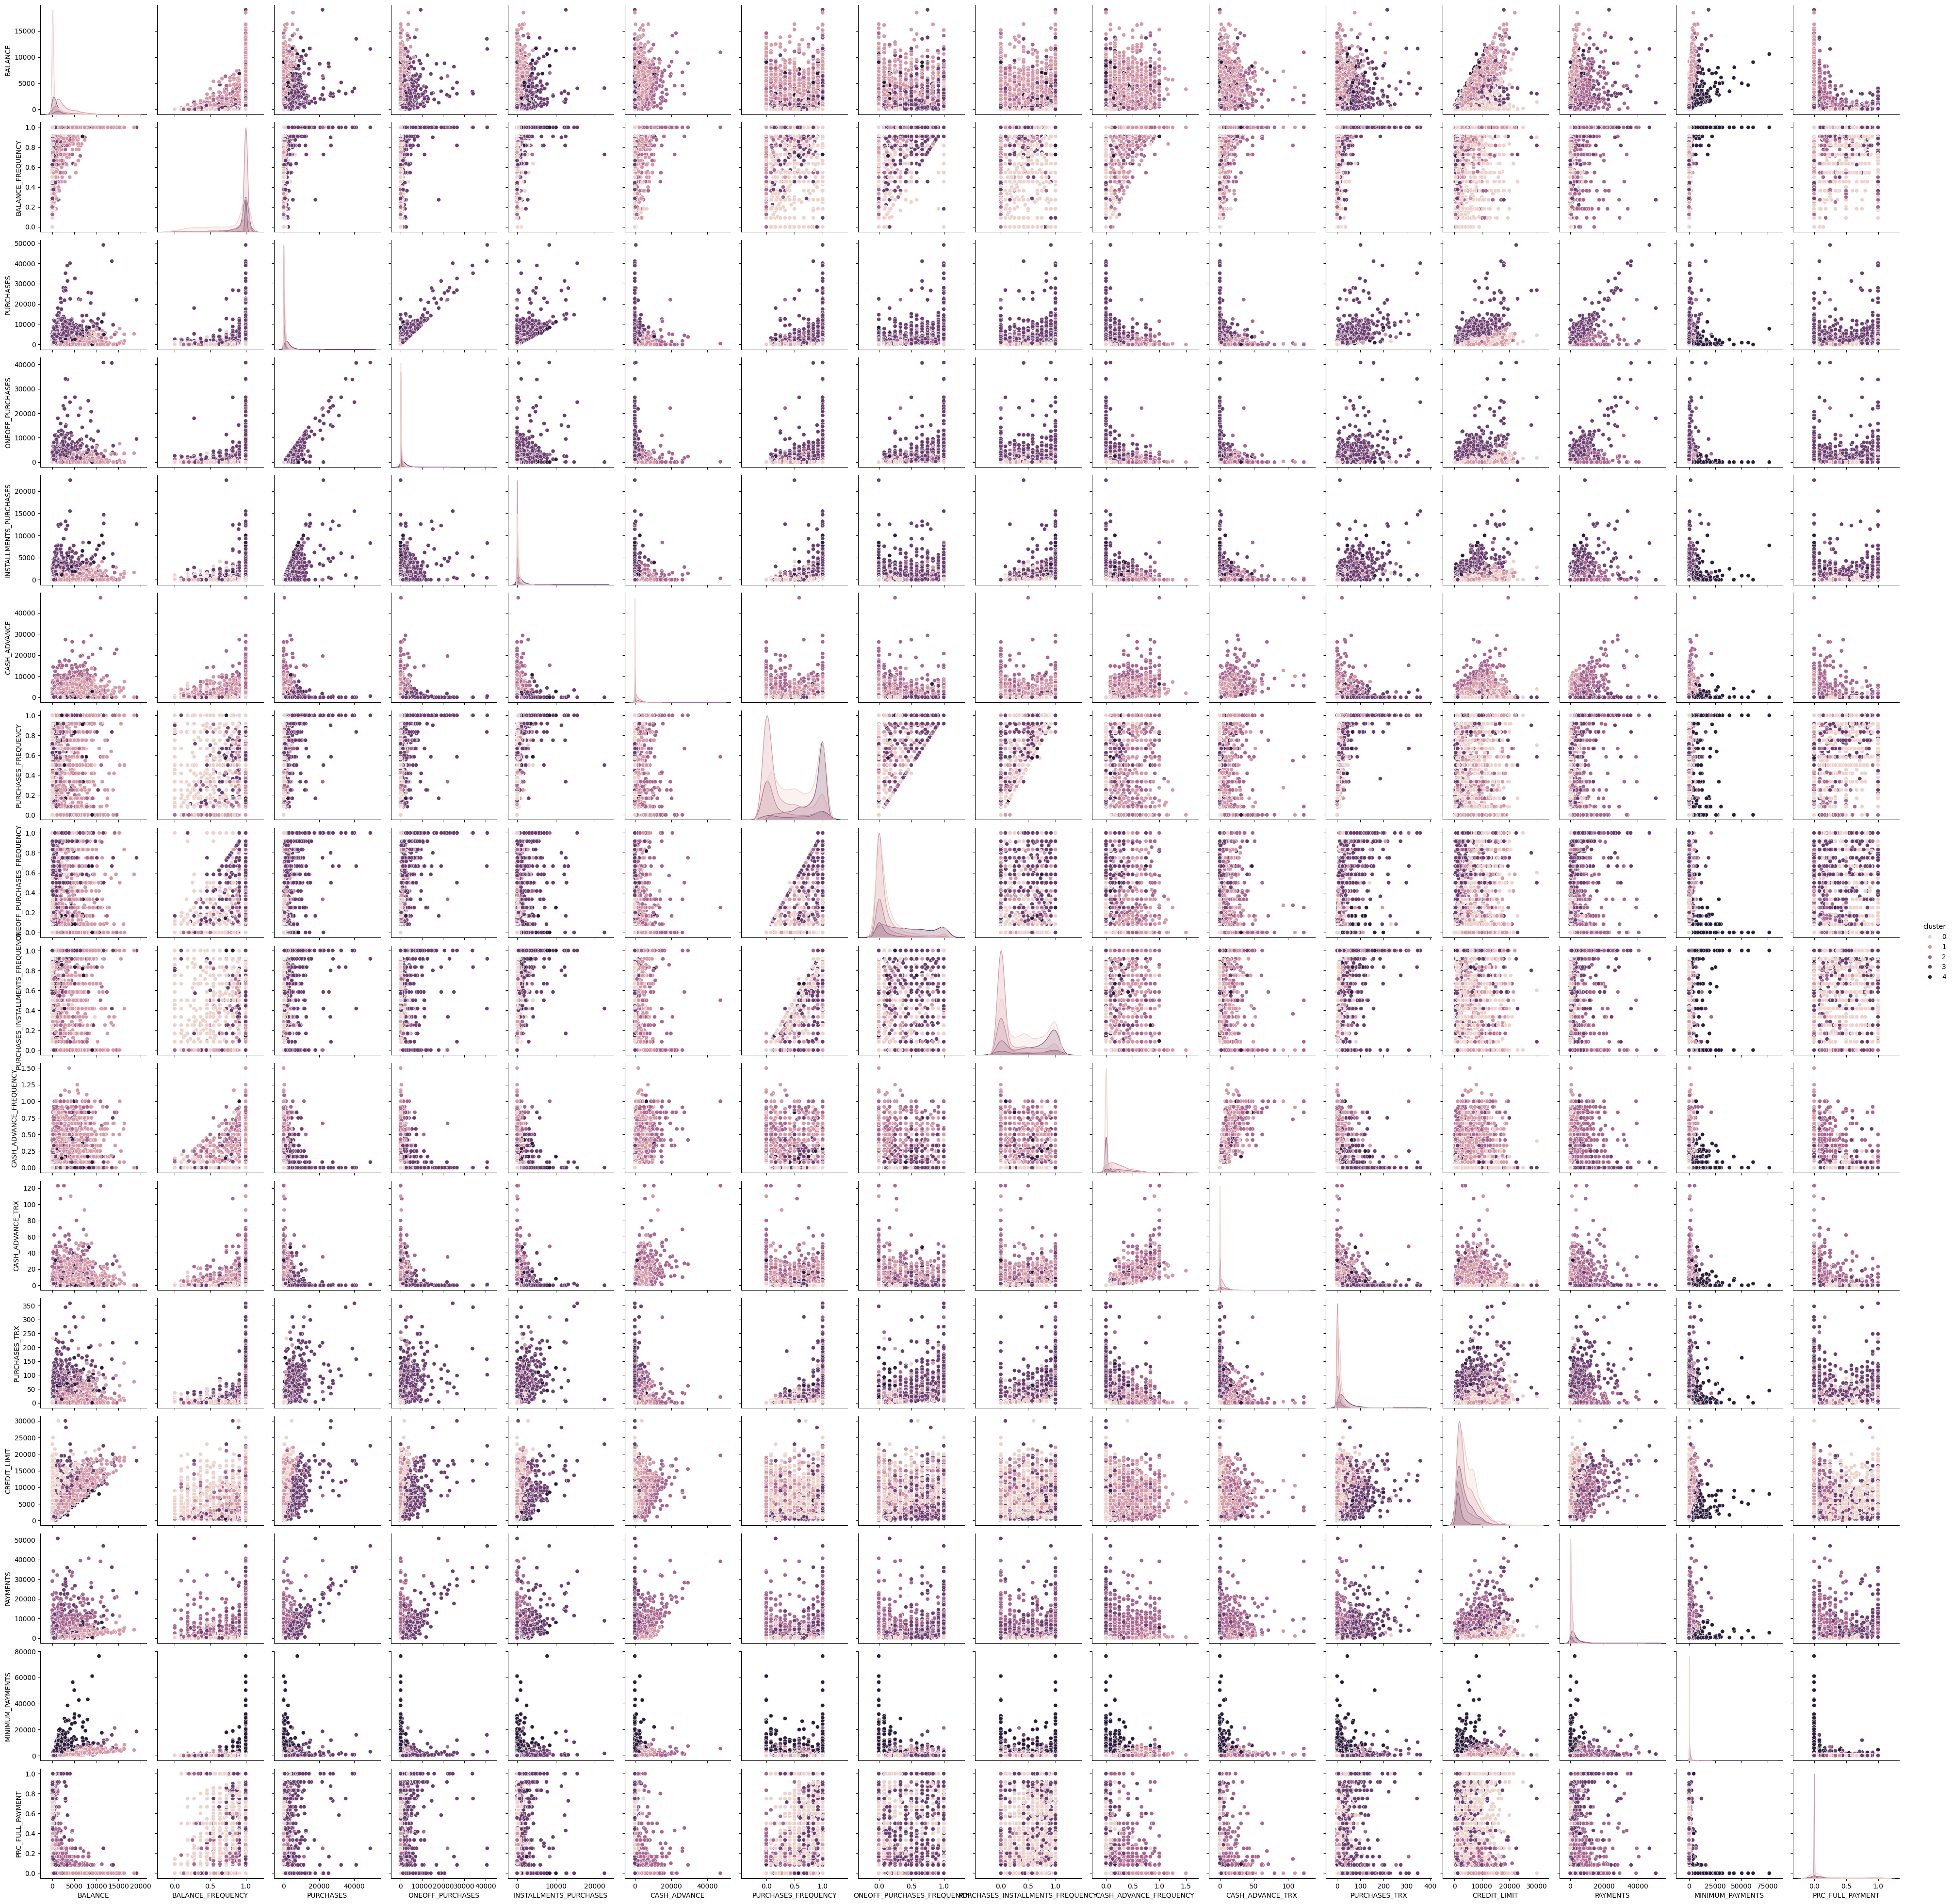

In [ ]:
sns.pairplot(dataframe, hue='cluster')

Temos agora um grande conjunto de gráficos, todos divididos em pares, cerca de 280. São muitos, e isso dificulta nosso processo de validação das informações. A visualização nem sempre é uma técnica que irá nos auxiliar na interpretação de clusters.

# descrevendo os atributos
---

In [ ]:
dataframe.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1074.0  1794.443291  1981.773996   0.000000   507.348768   
3        1536.0  1142.514535  1664.888183   0.000000   212.178230   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2        1087.920500  2312.923253  14581.459140            1074.0  0.862388   
3         554.332740  1370.859355  19043.138560            1536.0  0.928220   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.733727   4483.503862           3280.0  0.246806   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...       883.991828  21235.065300           1074.0  0.117321   
3        ...       524.184580  18621.013310           1536.0  0.278331   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346748  0.0  0.0  0.000000  0.444444  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.186720  0.0  0.0  0.083333  0.142857  1.0  
3        0.367137  0.0  0.0  0.083333  0.545455  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

Temos muitos atributos para se analisar, neste caso são 16, tanto que a tabela nem exibe todos. Ainda há casos em que há muitos mais, portanto é uma análise que seria impossível ser realizada por um aspecto visual.

Selecionaremos alguns dos atributos mais significativos. O que não quer dizer que os outros não sejam importantes, mas precisaremos fazer essa triagem para executar nossa análise.

# analisando os valores
---

In [ ]:
print(kmeans)

KMeans(max_iter=100, n_clusters=5, n_init=10)


In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[6.90890221e-02, 2.30787435e-04, 1.21507361e-01, 4.79670320e-02,
        7.36405575e-02, 2.43310654e-02, 1.72863102e-04, 3.36686718e-05,
        1.40328311e-04, 7.92341768e-06, 1.23962309e-04, 2.86381277e-03,
        9.43564102e-01, 1.53799817e-01, 5.68529799e-02, 7.61493366e-05],
       [5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.74388410e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [2.34955101e-01, 2.16241674e-04, 6.09376425e-02, 3.48207303e-02,
        2.61221122e-02, 3.99771273e-01, 5.27678241e-05, 2.06705276e-05,
        3.52208917e-05, 6.53734596e-05, 1.56898861e-03, 1.12880913e-03,
        5.35553118e-01, 5.97717529e-01, 1.04179623e-01, 2.76913169e-05],
       [1.60024706e-01, 2.45463238e-04, 4.38782328e-01, 2.57144577e-01,
        1.81809709e-01, 2.53743879e-02, 2.04517615e-04, 8.902

Observaremos a variância dos centroides para um determinado atributo, isto é, coletaremos um atributo e verificaremos como se comporta nos diferentes clusters.

Buscaremos atributos em que os valores sejam diferentes entre os clusters, pois assim ampliamos a chance de observar as particularidades de cada grupo.

# selecionando os atributos
---

In [ ]:
for _ in range(len(centroids[0])):
  print(dataframe.columns.values[_], '\n{:.4f}'.format(centroids[:, _].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [ ]:
atributos_com_maior_valor_de_variância = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

* BALANCE = limite disponível do cliente
* PURCHASES = valor total de compras
* CASH_ADVANCE = valor total de saques
* CREDIT_LIMIT = limite total de crédito
* PAYMENTS = valor total pago
* MINIMUM_PAYMENTS = o mínimo pago

O último atributo MINIMUM_PAYMENTS não nos interessa pois não trará muitos benefícios para a interpretação, então o removeremos da lista.

In [ ]:
atributos_com_maior_valor_de_variância.remove('MINIMUM_PAYMENTS')
atributos_com_maior_valor_de_variância

['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

# filtrando os valores
---

In [ ]:
dataframe.groupby('cluster')['BALANCE'].describe()

count         mean          std        min          25%  \
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1074.0  1794.443291  1981.773996   0.000000   507.348768   
3        1536.0  1142.514535  1664.888183   0.000000   212.178230   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                 50%          75%           max  
cluster                                          
0          82.941478   410.126095   9630.367575  
1        2174.018945  4223.867789  18495.558550  
2        1087.920500  2312.923253  14581.459140  
3         554.332740  1370.859355  19043.138560  
4        1337.287314  2138.678431  11670.179850

In [ ]:
dataframe.groupby('cluster')['BALANCE'].mean()

cluster
0     443.746756
1    3037.962543
2    1794.443291
3    1142.514535
4    1987.501586
Name: BALANCE, dtype: float64

In [ ]:
describe = dataframe.groupby(
    'cluster')[atributos_com_maior_valor_de_variância].mean()
describe

BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0         443.746756   629.249107    141.482978   5130.547795   814.294226
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376
2        1794.443291   478.411620   3266.686592   3983.399639  4712.044614
3        1142.514535  3274.126719    181.727235   4096.718849  3036.609179
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911

In [ ]:
describe['N_CLIENTS'] = dataframe.groupby(
    'cluster')[atributos_com_maior_valor_de_variância].size()
describe

BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.746756   629.249107    141.482978   5130.547795   814.294226   
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
2        1794.443291   478.411620   3266.686592   3983.399639  4712.044614   
3        1142.514535  3274.126719    181.727235   4096.718849  3036.609179   
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911   

         N_CLIENTS  
cluster             
0             3280  
1             2649  
2             1074  
3             1536  
4              411

# interpretando os clusters
---

Trata-se de uma análise mais subjetiva, não existe uma única maneira correta para realizá-la.

In [ ]:
dataframe.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        3280.0  0.246806  0.346748  0.0  0.0  0.000000  0.444444  1.0
1        2649.0  0.001799  0.023260  0.0  0.0  0.000000  0.000000  0.6
2        1074.0  0.117321  0.186720  0.0  0.0  0.083333  0.142857  1.0
3        1536.0  0.278331  0.367137  0.0  0.0  0.083333  0.545455  1.0
4         411.0  0.019318  0.090901  0.0  0.0  0.000000  0.000000  1.0

* **Análise do Cluster 0**

  O Cluster 0, com 3.280 clientes, apresenta um saldo e compras moderados, com média de saldo de 443,75 e compras totalizando 629,25. O avanço de dinheiro é relativamente baixo, em 141,48, indicando que os clientes deste cluster preferem compras em vez de avanços em dinheiro. O limite de crédito é alto, com média de 5.130,55, sugerindo um certo nível de confiança financeira por parte da instituição de crédito. Os pagamentos também são substanciais, totalizando 814,29, o que indica um comportamento financeiro responsável. No entanto, a porcentagem de pagamentos totais é baixa, com média de 0,25, sugerindo que a maioria dos clientes não paga integralmente suas faturas de cartão de crédito a cada mês. Este cluster pode representar indivíduos com hábitos de gastos moderados, alto limite de crédito, que conseguem fazer pagamentos significativos, mas geralmente carregam um saldo.

* **Análise do Cluster 1**

  O Cluster 1 consiste de 2.649 clientes que têm um saldo médio elevado de 3.037,96, mas compras relativamente baixas de 385,25. Seu avanço de dinheiro é considerável, em 1.636,92, indicando uma preferência por dinheiro em vez de compras no cartão. O limite de crédito é um pouco menor que o do Cluster 0, em 4.495,77, e seus pagamentos também são menores, totalizando 968,89. Um aspecto marcante deste cluster é a porcentagem extremamente baixa de pagamento total, com média de apenas 0,0018. Isso sugere que os clientes deste cluster frequentemente dependem de avanços de dinheiro e raramente pagam integralmente seus saldos de cartão de crédito, possivelmente indicando pressão financeira ou uso estratégico do crédito disponível.

* **Análise do Cluster 2**

  O Cluster 2, com 1.074 clientes, mostra um uso significativo de avanços de dinheiro, com média de 3.266,69, o mais alto entre todos os clusters. Seu saldo também é elevado, em 1.794,44, e as compras são moderadas, em 478,41. O limite de crédito é o mais baixo entre os clusters, em 3.983,40, mas os pagamentos são os mais altos, totalizando 4.712,04, o que é bastante significativo. A porcentagem de pagamento total neste cluster é de 0,12, relativamente baixa, mas maior que a dos clusters 1 e 4. Esses clientes parecem utilizar avanços de dinheiro intensamente, mas também fazem pagamentos grandes, sugerindo que podem usar seus cartões de crédito para transações financeiras substanciais e possivelmente têm situações variáveis de fluxo de caixa.

* **Análise do Cluster 3**

  O Cluster 3 inclui 1.536 clientes que apresentam um comportamento de compra muito alto, com compras médias de 3.274,13. Seu saldo é moderado, em 1.142,51, e fazem uso mínimo de avanços de dinheiro, em 181,73. O limite de crédito é 4.096,72, e os pagamentos são substanciais, totalizando 3.036,61. Este cluster possui a maior porcentagem de pagamento total, com média de 0,28, indicando que esses clientes tendem a pagar suas compras integralmente com mais frequência do que os outros clusters. Este cluster provavelmente representa indivíduos com alta atividade de compra e comportamento responsável de pagamento, que gerenciam bem o crédito e evitam manter saldos elevados.

* **Análise do Cluster 4**

  O Cluster 4, o menor com 411 clientes, mostra saldos altos (1.987,50) e compras moderadas (854,87). Avanços de dinheiro são baixos, em 421,13, e o limite de crédito é o segundo mais baixo, em 2.227,74. Os pagamentos também são moderados, em 1.336,24. A porcentagem de pagamento total é baixa, em 0,019, indicando que esses clientes geralmente não pagam seus saldos integralmente. Este cluster pode representar indivíduos com saldos relativamente altos e compras moderadas, mas que frequentemente carregam seus saldos, sugerindo desafios potenciais na gestão financeira ou uso estratégico dos saldos.